In [ ]:
import os
print(os.path.exists('/content/B500.mat'))

True


In [ ]:
import scipy.io

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat',appendmat=False)

# Print the keys (variable names) in the loaded .mat file
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 'rpm', 'ru'])


In [ ]:
import scipy.io
import matplotlib.pyplot as plt

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat',appendmat=False)

# Check the keys in the loaded .mat file
print(mat.keys())

# If there is an array representing an image
if 'ru' in mat:
    # Access the image data
    image_data = mat['ru']

    # Display the image (optional)
    plt.imshow(image_data)
    plt.axis('off')
    plt.show()

    # Save the image as PNG
    plt.imsave('output_image.png', image_data)

else:
    print('No image data found in the .mat file.')


dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 'rpm', 'ru'])


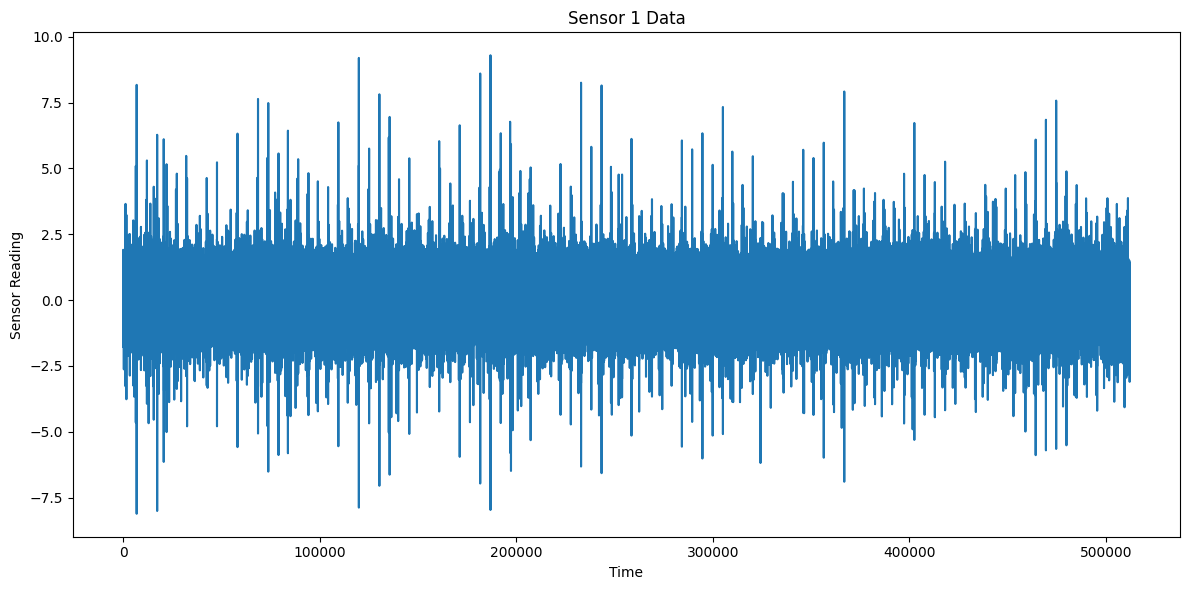

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat',appendmat=False)

# Extract individual components from the dictionary
data = mat['data']
fs = mat['fs']
rpm = mat['rpm']
ru = mat['ru']


# Determine dimensions of data arrays
num_samples, num_channels = data.shape

# Plot sensor data for each channel
plt.figure(figsize=(12, 6))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i + 1)
    plt.plot(data[:, i])
    plt.title(f'Sensor {i+1} Data')
    plt.xlabel('Time')
    plt.ylabel('Sensor Reading')

# Combine all plots into a single image
plt.tight_layout()
plt.savefig('combined_sensor_data.png')

# Display the combined image (optional)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat', appendmat=False)

# Extract individual components from the dictionary
data = mat['data']

# Combine sensor data into a single waveform
waveform = np.mean(data, axis=1)  # You can adjust how you combine the data (e.g., using mean, sum, etc.)

# Normalize the waveform to the range [-1, 1] (optional)
waveform /= np.max(np.abs(waveform))

# Save the waveform as a .wav file
wavfile.write('combined_sensor_data.wav', int(fs), waveform)

print("Waveform saved as combined_sensor_data.wav")


Waveform saved as combined_sensor_data.wav


<ipython-input-10-665adcaf435f>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wavfile.write('combined_sensor_data.wav', int(fs), waveform)


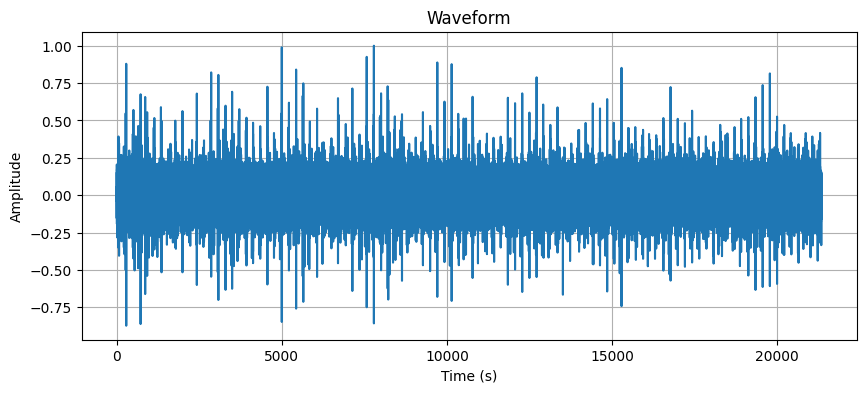

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .wav file
sample_rate, waveform = wavfile.read('combined_sensor_data.wav')

# Calculate time array
duration = len(waveform) / sample_rate
time = np.linspace(0., duration, len(waveform))

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, waveform)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid(True)
plt.show()


<ipython-input-12-7ba108714a1e>:13: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  f, t, s = spectrogram(x, fs, window=kaiser(256, 5), noverlap=220, nfft=512)


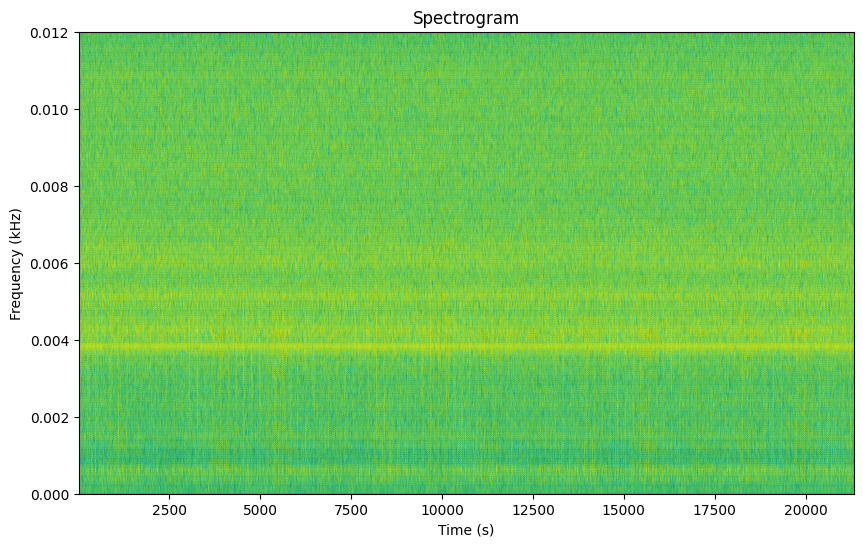

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, kaiser

# Load the .wav file
fs, x = wavfile.read('combined_sensor_data.wav')

# Define time array
t = np.arange(0, len(x)/fs, 1/fs)

# Compute STFT
f, t, s = spectrogram(x, fs, window=kaiser(256, 5), noverlap=220, nfft=512)

# Compute magnitude squared of STFT
sdb = 10 * np.log10(np.abs(s))

# Plot spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f/1000, sdb, shading='gouraud', cmap='viridis')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('Spectrogram')
plt.show()


<ipython-input-8-4dc4114c925f>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  spec, freqs, t, im = ax1.specgram(data_for_specgram, Fs=float(fs), NFFT=256, cmap='twilight')


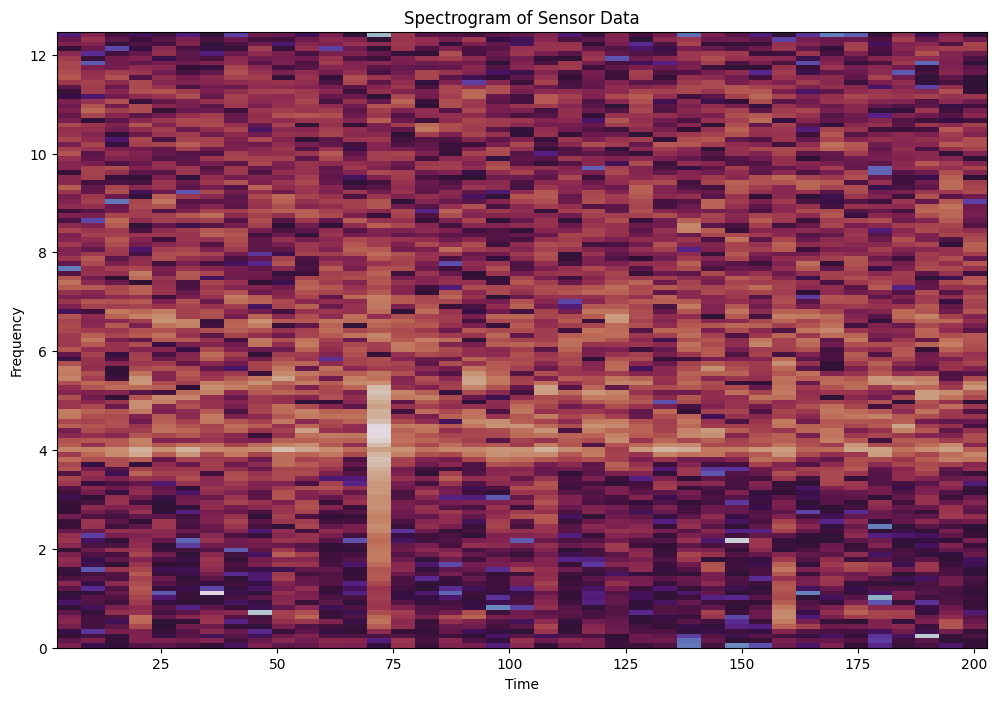

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat')

# Extract individual components from the dictionary
data = mat['data']
fs = mat['fs']
rpm = mat['rpm']
ru = mat['ru']

# Determine dimensions of data arrays
num_samples, num_channels = data.shape

st=int(num_samples/100)
end = st + st

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 8))

data_for_specgram = data[st:end, 0]

# Plot spectrogram of sensor data
spec, freqs, t, im = ax1.specgram(data_for_specgram, Fs=float(fs), NFFT=256, cmap='twilight')
ax1.set_title('Spectrogram of Sensor Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Adjust layout


# Save the image
plt.savefig('combined_sensor_data.png')

# Display the image (optional)
plt.show()


In [ ]:
import scipy.io
import numpy as np

# Load .mat file
mat_data = scipy.io.loadmat('/content/B500.mat')

# Display all numeric data for every key
for key, value in mat_data.items():
    print(f"Key: {key}")
    if isinstance(value, (int, float, complex, list, np.ndarray)):
        print(value)
    elif isinstance(value, dict):  # Handle nested dictionaries
        for nested_key, nested_value in value.items():
            if isinstance(nested_value, (int, float, complex, list, np.ndarray)):
                print(f"  {nested_key}: {nested_value}")


Key: __header__
Key: __version__
Key: __globals__
[]
Key: data
[[-0.34357557]
 [-0.07140313]
 [ 0.18997874]
 ...
 [-1.82823065]
 [-0.59752596]
 [ 0.74405342]]
Key: fs
[[24.93]]
Key: rpm
[[-1.23141266e-04]
 [-2.18301926e-04]
 [-1.76079497e-04]
 ...
 [ 1.45409845e+03]
 [ 1.45409941e+03]
 [ 1.45410047e+03]]
Key: ru
[[-0.00314207]
 [-0.00244709]
 [-0.00260559]
 ...
 [-0.65266762]
 [ 0.25275306]
 [-0.22923205]]


<ipython-input-19-a837bde6f6fd>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f, t, Zxx = stft(data_for_stft, fs=float(fs), nperseg=256)


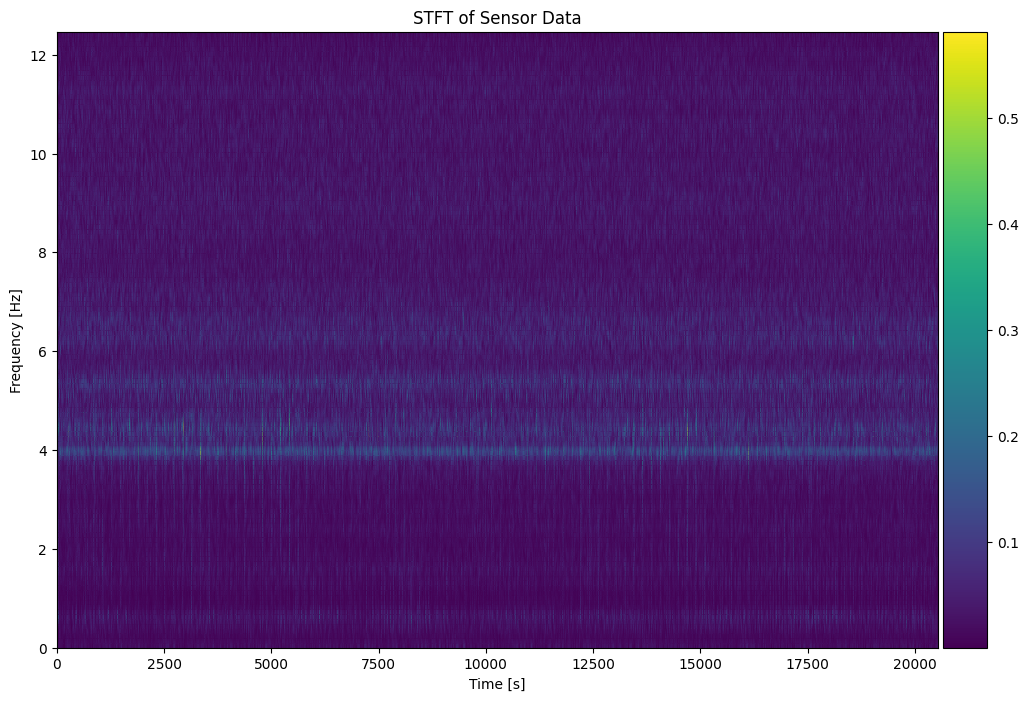

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
import scipy.io
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the .mat file
mat = scipy.io.loadmat('/content/B500.mat')

# Extract individual components from the dictionary
data = mat['data']
fs = mat['fs']
rpm = mat['rpm']
ru = mat['ru']

# Determine dimensions of data arrays
num_samples, num_channels = data.shape

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 8))

data_for_stft = data[:, 0]

# Compute STFT
f, t, Zxx = stft(data_for_stft, fs=float(fs), nperseg=256)

# Plot STFT
im = ax1.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
ax1.set_title('STFT of Sensor Data')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Frequency [Hz]')

# Add colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

# Save the image
plt.savefig('stft_sensor_data_time_frequency.png')

# Display the image
plt.show()
